Transformation (1)Linear

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving pexels-blaque-x-863963.jpg to pexels-blaque-x-863963 (4).jpg
Original Image Size: 6000x4000


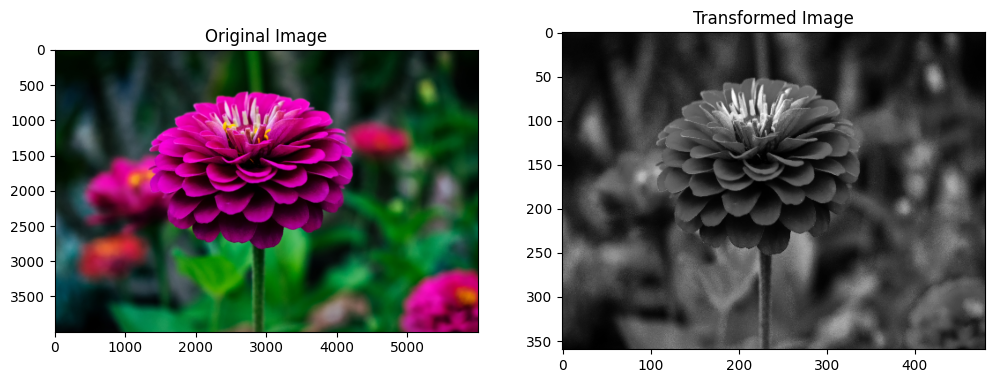

In [64]:
import cv2
import numpy as np
from google.colab import files, drive
import io
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Upload the image
uploaded = files.upload()

# Loop through uploaded files
for filename in uploaded.keys():
    img_bytes = uploaded[filename]
    img = Image.open(io.BytesIO(img_bytes))

    # Print the original image size
    original_width, original_height = img.size
    print(f'Original Image Size: {original_width}x{original_height}')

    # Convert the image to grayscale
    grayscale_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    # Define the desired width and height
    desired_width, desired_height = 480, 360

    # Scale the image
    transformed_img = cv2.resize(grayscale_img, (desired_width, desired_height))

    # Save the transformed image to Google Drive
    transformed_img_path = f'/content/drive/My Drive/transformed_{filename}'
    cv2.imwrite(transformed_img_path, transformed_img)

    # Display both the original and transformed images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')

    # Transformed image
    axes[1].imshow(transformed_img, cmap='gray')
    axes[1].set_title('Transformed Image')

    plt.show()

    # Provide a download link for the transformed image
    download_link = f'<a href="{transformed_img_path}" download>Click here to download the transformed image</a>'
    display.display(display.HTML(download_link))

In [ ]:
import cv2
import numpy as np
from google.colab import files, drive
import io
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

# Mount Google Drive for saving transformed images
drive.mount('/content/drive')

# Upload images
uploaded = files.upload()

# Process each uploaded image
for filename in uploaded.keys():
    img_bytes = uploaded[filename]
    img = Image.open(io.BytesIO(img_bytes))

    # Display original image
    display.display(img)

    # Original image size
    original_width, original_height = img.size
    print(f'Original Image Size: {original_width}x{original_height}')

    # Convert to grayscale
    grayscale_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    # Customizable parameter for the transformation
    c = 255 / np.log(1 + np.max(grayscale_img))

    # Apply the logarithmic transformation
    log_transformed_img = c * (np.log(grayscale_img + 1)).astype(np.uint8)

    # Transformed image size
    transformed_width, transformed_height = log_transformed_img.shape[1], log_transformed_img.shape[0]
    print(f'Transformed Image Size: {transformed_width}x{transformed_height}')

    # Save transformed image to Google Drive
    transformed_img_path = f'/content/drive/My Drive/log_transformed_{filename}'
    cv2.imwrite(transformed_img_path, log_transformed_img)
    print(f'Transformed image saved to: {transformed_img_path}')

    # Display original and transformed images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(log_transformed_img, cmap='gray')
    plt.title('Log-Transformed Image')
    plt.axis('off')

    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving pexels-blaque-x-863963.jpg to pexels-blaque-x-863963 (8).jpg
